# What Makes a Cult Classic? A K-Means Clustering Analysis of Films.
### **Project Overview.**
Stilinski movie studio is a production company that produces Horror films in Africa. Due to its recent success, the company has felt the need to diversify its portfolio and has identified cult films as an exciting new production branch. However, due to the fact that they have only produced horror films and have no idea on anything about cult films, they have commission us to find out what makes a cult classic.

This project is going to analyze past cult films and shows performances over the years and identify patterns or aspects that made them stand out in the box office. Our findings will help stakeholders in the company make informed decisions in the next crucial steps moving forward.

## **Business Understanding.**
The film industry as a whole involves understanding how films are developed, financed, produced, distributed and monetized. In order to make informed decisions on those areas, we are going to explore the patterns or aspects of cult films currently doing well, and let our findings guide our recommendations. 

The industry is characterized by:

- High upfront investment with uncertain returns.

- Global and local market reach.

- Revenue from multiple channels, including;

  - Box office ticket sales

  - Streaming

  - DVD/Blu-ray sales

### Problem Statement.
Stilinski Company, having operated outside of cult film production but also inside of the film industry, is in a very intresting position as its journeying into a new, yet not very new territory. It's knowledge of how movie production works places it ahead and maybe even in a unique position as intergrating the world of horror and cult may give birth to something the audience has actually been waiting for.

Cult classics are often loved by niche audiences and do  not always follow blockbuster rules. This project seeks to explore whether we can group films into meaningful categories and identify where cult classics land.

This project seeks to give answers to the following question;

1. What makes a cult classic?

### Project Objectives.
- Strong Box Office Performance.

- Market Penetration & Audience Reach.

- Consistently producing quality, successful content.

- Having different revenue Streams beyond box office earnings.

- Films should receive favorable reviews and ratings on platforms like IMDb, Rotten Tomatoes, and Metacritic.

- Awards and Industry Recognition.

### Stakeholders.

1. Studio executive - Primary decision maker

2. Marketing team - Plan on promotions and time for release

3. Finance team - Budget planning

4. Production team - Content creation

5. Investors - Provides fundings for the productions.

### Project plan.
We will be using libraries such as pandas, matplotlib, seaborn and sklearn to carry out the following;
- Exploratory Data Analysis (EDA)

- Feature engineering

- Genre Encoding

- Scaling

- K-Means Clutering

- Data Visualization

## **Data Understanding.**
### Data source.
Under the file path `Data/`, we have a cult movies dataset compiled from different movie websites by the use of Artificial Intelligence (AI). The dataset, `cult_classics_dataset.csv`, contains data from the Internet Movie Database (IMDB) giving us access to movie titles, their genres, ratings, revenues and many more from the year 1994 to 2014.

### Why is the dataset suitable for this project?
In the project overview, we mention that this project seeks to understand what makes a cult film/show a classic. This dataset contains information on cult films that will help us understand, through our analysis, what really makes a cult classic through different film aspects.

- This dataset is suitable for the project as it allows analysis of past movie performance data, including audience ratings, and box office numbers, to create models that predict the potential success of upcoming films. Also, community reviews and ratings reveal audience tastes and preferences, which can help the studio tailor their content to appeal to specific demographics and genres. 

- The database provides a wealth of data for market research, allowing us to understand trends, competitor activities, and potential opportunities.

### Exploring the dataset for understanding.
#### Importing dependancies and loading the dataset.
To work smoothly and efficiently, we are using python libraries for our analysis and other things.

We are using the pandas' `read_csv()` method to efficiently load the dataset into the notebook.

In [ ]:
# Import all the dependencies needed for this project.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the dataset using pandas
cult_classics = pd.read_csv('Data/cult_classics_dataset.csv', sep= ',')

#### Qualitative Analysis.
In this part we are exploring the dataset, trying to understand its qualities and its structure. We are also looking to flag any data quality issues that may impact our analysis negatively. We will be looking at the first few rows and also at the dataset's summary.

In [53]:
# Get a preview of what we are working with, we are using the .head() method.
cult_classics.head()

,Title,Genres,Runtime,Release Year,IMDB Rating,Metascore,Votes,Revenue (Millions),Keywords
0,The Matrix,"Action, Sci-Fi",136,1999,8.7,73,1900000,463.5,"virtual reality, dystopia"
1,Donnie Darko,"Drama, Mystery",113,2001,8.0,88,800000,7.5,"time travel, alternate universe"
2,Pulp Fiction,"Crime, Drama",154,1994,8.9,94,1900000,213.9,"nonlinear, hitman"
3,Avatar,"Action, Adventure",162,2009,7.8,83,1200000,2787.9,"alien, sci-fi"
4,Into the Wild,"Adventure, Biography",148,2007,8.1,73,600000,56.3,"nature, escape"


From the first preview, we see that the data has 9 columns out of which 3 columns contain values stored as objcts and the rest as numerical datasets. However, we cannot be certain. In the next code we are using the .info() method to give us a consice summary of the data.

In [54]:
# This will help us understand the structure of the data
# How many rows, columns, non null counts, datatypes etc. does the dataset have?

cult_classics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               10 non-null     object 
 1   Genres              10 non-null     object 
 2   Runtime             10 non-null     int64  
 3   Release Year        10 non-null     int64  
 4   IMDB Rating         10 non-null     float64
 5   Metascore           10 non-null     int64  
 6   Votes               10 non-null     int64  
 7   Revenue (Millions)  10 non-null     float64
 8   Keywords            10 non-null     object 
dtypes: float64(2), int64(4), object(3)
memory usage: 848.0+ bytes


In [55]:
# Check for duplicates
cult_classics.duplicated().sum()

0

The dataset contains information stored in 9 columns and 10 rows. The values are stored as objects, floats and integers. The dataset is also mostly clean with all columns having the same non null counts as the number of rows stated and contains no duplicated records.

#### Quantitative Analysis.
Here we will be looking at the quantitative summary of the dataset including the numerical data's measures of central tendencies, measures of spread and some aggregate functions.

In [56]:
# Use the .describe() method to obtain the statistics summary of the data.
# This method generates descriptive statistics of the data.

cult_classics.describe()

,Runtime,Release Year,IMDB Rating,Metascore,Votes,Revenue (Millions)
count,10.000000,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,129.200000,2004.300000,7.650000,72.800000,9.880000e+05,382.85000
std,22.552654,6.447222,1.542905,24.733243,6.670799e+05,856.06742
min,96.000000,1994.000000,3.600000,9.000000,8.000000e+04,1.80000
25%,114.500000,1999.500000,7.725000,67.750000,5.250000e+05,46.42500
50%,131.000000,2003.500000,8.000000,78.000000,7.000000e+05,78.60000
75%,145.750000,2008.500000,8.550000,88.000000,1.650000e+06,186.22500
max,162.000000,2014.000000,8.900000,94.000000,1.900000e+06,2787.90000


The code above provides us the statistical summary of all the numerical columns in the dataset. The average runtime in the dataset is 129.2 minutes, while in IMDB Rating and Metascore in 7.65 and 72.8 respectively. It also oes as far as proving us with the 25th, 50th and 75th percentiles.

## **Data Cleaning.**
During our initial data exploration for our data understandinmg, we figured that there weren't a lot of data quality issues. We do not have null values, or any duplicates.

However, lack of the main culprits, does not mean that we do not have to clean the data. In this section we are going to strip and replace the space between the column names with the underscore `_`, and we are going to turn all the names to lower cases for consistency. We are also going to create a primary_genre column and split the genres in every row in the genre column.

In [57]:
# Rename columns for consistency
cult_classics.columns = cult_classics.columns.str.strip().str.lower().str.replace(' ', '_')

# Create primary genre
cult_classics['primary_genre'] = cult_classics['genres'].apply(lambda x: x.split(',')[0].strip())

In [58]:
# Preview the changes made
cult_classics.head()

,title,genres,runtime,release_year,imdb_rating,metascore,votes,revenue_(millions),keywords,primary_genre
0,The Matrix,"Action, Sci-Fi",136,1999,8.7,73,1900000,463.5,"virtual reality, dystopia",Action
1,Donnie Darko,"Drama, Mystery",113,2001,8.0,88,800000,7.5,"time travel, alternate universe",Drama
2,Pulp Fiction,"Crime, Drama",154,1994,8.9,94,1900000,213.9,"nonlinear, hitman",Crime
3,Avatar,"Action, Adventure",162,2009,7.8,83,1200000,2787.9,"alien, sci-fi",Action
4,Into the Wild,"Adventure, Biography",148,2007,8.1,73,600000,56.3,"nature, escape",Adventure


### **Exploratory Data Analysis (EDA).**
This section we will be getting a feel of the data. We already know the structure of the data as well as the quantitative part of it. This section is to visualize the data and make us familiar with the content of the columns. In this section we are using the seaborn library for our visualizations.

#### Rating distribution.
Here we are looking at how the ratings have been distributed in the data that we have. This will help us know the average of the ratings or rather the most frequent rating there is in cult box office.

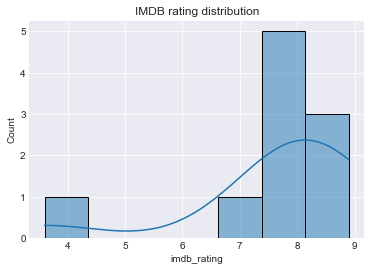

In [59]:
# set style
plt.style.use('seaborn-darkgrid')

# Plot distribution
sns.histplot(x= cult_classics['imdb_rating'], kde= True)
plt.title('IMDB rating distribution')
plt.show();

In the plot above, the highest rating is 9 but most of the films, around 90 per cent of the films, have a rating of 6.5 to around 9. The most films, around 50 per cent, are rated from 7.5 to 8. Following closely, we have the second most films rating at 9.

#### Voters vs Revenue.
We are checking to see if the number of voters in a film influenced its revenue. This will help us identify if as a production company, you should worry about the number of voters.

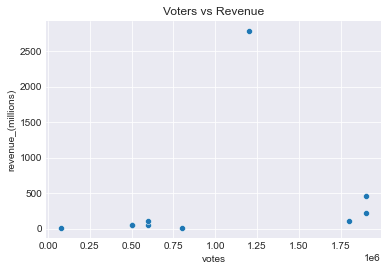

In [60]:
# Plot votes against revenue.
sns.scatterplot(x= 'votes', y= 'revenue_(millions)', data= cult_classics)
plt.title('Voters vs Revenue')
plt.show()

From the plot, we can conclude that the number of votes do not influence the amount of revenue a film can gross. Apart from the only one that had the highest revenue, which in this case is an outlier, the rest prove that the two do not influece each other.

#### Runtime vs Revenue.
According to a previous study we did, we found that runtime, in some genres, influence the amount of revenue a film can gross. To customize this finding to the cult films, we are trying to find out if the two aspects are correlated.

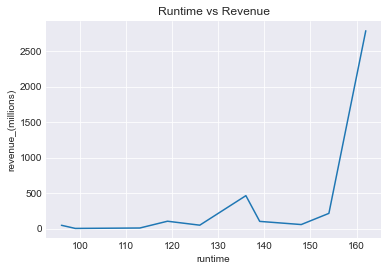

In [61]:
# Plot runtime vs revenue.
sns.lineplot(data= cult_classics, x= 'runtime', y= 'revenue_(millions)')
plt.title('Runtime vs Revenue')
plt.show()

It is clear that the higher the runtime, the higher the film's revenue. This maybe a coincidence or it maybe true, To be sure about this, we are going to do further analysis and find out if the two cause each other. Remember, they may be correlated but they do not cause changes in the other.

#### Metascore vs Rating.
Here we are checking to see if metascore is correlated to the film ratings. 

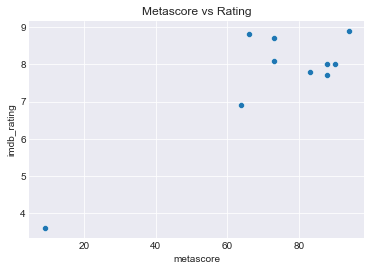

In [62]:
# Plot metascore distribution.
sns.scatterplot(x= 'metascore', y= 'imdb_rating', data= cult_classics)
plt.title('Metascore vs Rating')
plt.show()

The lower the metascore, the lower the rating. In the plot above we can see the relationship is non linear but the concept is quite clear. The two might be slightly correlated. This is because despite seeming that the lower the metascore, the lower the rating, we see that in some films, this isn't the case. For instance, in the film having a metascore of around 60s or 70s, the rating is at 9, but we still have films with higher ratings than that and the have lower ratings.

#### Genre Distribution.
In the dataset,we have several movies that contain multiple genres, this will help us identify the genres most combined with others in cult films. 

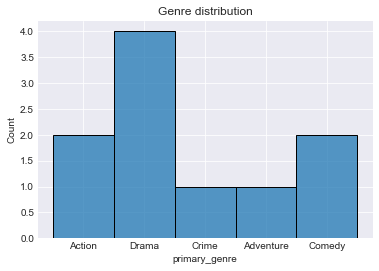

In [63]:
# Plot genre distribution
sns.histplot(x= cult_classics['primary_genre'])
plt.title('Genre distribution')
plt.show()

Drama is the most combined primary genre in the cult film industry, followed closely by action and comedy genres. 

#### Columns Correlation.
In this section we are going to look at how and if the columns are correlated.

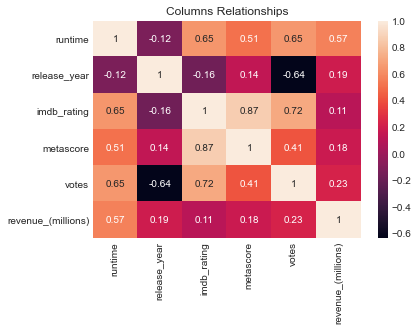

In [64]:
# Check correlation in columns
# Plot heatmap
sns.heatmap(cult_classics.corr(), annot= True)
plt.title('Columns Relationships')
plt.show()

In the plot above, we find that several columns are correlated with each other. Metascore and ratings have a high positive correlation at 0.87. Ratings and votes follow closely at 0.72, concluding that the two have a high positive correlation. Other columns that correlate are the runtime and rating columns, the two columns have a low positive correlation at 0.65.

## **Analysis.**
In tHis section we will be trying to answer the question posed, this process will involve;
- Preparing data for analysis.

- Analyzing the data. 

### Preparing data for analysis.
First we are going to slice the data to only have the columns relevant for our analysis. We will be using the following columns;
- `imdb_rating` - This column reflects audience enjoyment

- `metascore` - reflects critic reception

- `votes` - reflects popularity of the movie

- `revenue_(millions)` - financial success

- `runtime` - gives clues about genre tendencies

- `primary_genre` - to explore how genres affect clustering

These columns have also been chosen because they are numerical or are categorical and can be encoded.

In [65]:
# Slice relevant columns
cult_features = cult_classics[['imdb_rating', 'metascore', 'votes', 'revenue_(millions)', 'runtime', 'primary_genre']]

# Preview the dataset
cult_features.head()

,imdb_rating,metascore,votes,revenue_(millions),runtime,primary_genre
0,8.7,73,1900000,463.5,136,Action
1,8.0,88,800000,7.5,113,Drama
2,8.9,94,1900000,213.9,154,Crime
3,7.8,83,1200000,2787.9,162,Action
4,8.1,73,600000,56.3,148,Adventure


We have already chosen the columns we want to use and so in the next step, we are encoding the only categorical data in our dataset. This is a crucial step in preparing our data for clustering because we can't use words like 'Drama' in clustering.

We are converting the `primary_genre` into dummy variables using the .get_dummies() method from pandas. Where the value is 'drama' in the column, this will turn it into a column called `primary_genre_drama` where if true, the value will be 1 and if false the value will be 0.

In [66]:
# Convert primary_genre into dummy variables
# We are using the drop_first = True to avoid redundant info
encoded_features = pd.get_dummies(cult_features, columns=['primary_genre'], drop_first= True)

# Preview dataset
encoded_features.head()

,imdb_rating,metascore,votes,revenue_(millions),runtime,primary_genre_Adventure,primary_genre_Comedy,primary_genre_Crime,primary_genre_Drama
0,8.7,73,1900000,463.5,136,0,0,0,0
1,8.0,88,800000,7.5,113,0,0,0,1
2,8.9,94,1900000,213.9,154,0,0,1,0
3,7.8,83,1200000,2787.9,162,0,0,0,0
4,8.1,73,600000,56.3,148,1,0,0,0


Next we are going to standardize/scale our data. This is because the KMeans clustering uses distance to form clusters. In our dataset we have a column, `votes`, is much larer in scale than every other column, this will dominate the clustering.

Standardizing the columns will make them have a mean of 0 and a standard deviation of 1.

In [67]:
# Standardize the dataset.
# This will turn the encoded_features dataset to a numerical matrix.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(encoded_features)


### Analyzing the data.
In this section we are going to cluster the data using the KMean clustering function based on the features we've prepared above. Clustering will help us find groups of movies that share patterns. This process is going to involve;
- choosing the best number of clusters

- run KMeans 

- add the cluster labels back to the original data

- interpret what each cluster means

#### Choosing the best number of clusters.
In this part we'll be trying multiple values of k, that is number of clusters, and plot the inertia, how tight the groups are. We want a point where adding more clusters doesn't help much, this is the elbow method.

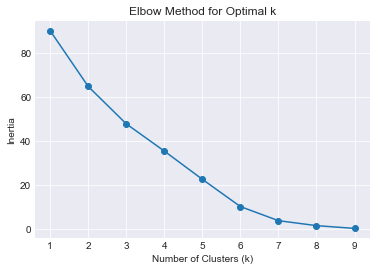

In [68]:
# Choose the best number of clusters.
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

Inertia measures how far each point is from the cluster's centroid, center of the cluster. The lower the distance, the better however, if the distance is too low it might mean overfitting. Through the elbow method, we choose to have 3 cluster points.

#### Running KMeans and Adding the clusters to the original data.
In the code above we have performed an elbow method and have decided to have 3 cluster groups. In the next code we will be running the KMeans and adding the clusters to the original dataset.

In [82]:
# Final clustering
kmeans = KMeans(n_clusters= 3, random_state= 42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
cult_classics['cluster'] = clusters

# preview the dataset
cult_classics.head()

,title,genres,runtime,release_year,imdb_rating,metascore,votes,revenue_(millions),keywords,primary_genre,cluster
0,The Matrix,"Action, Sci-Fi",136,1999,8.7,73,1900000,463.5,"virtual reality, dystopia",Action,0
1,Donnie Darko,"Drama, Mystery",113,2001,8.0,88,800000,7.5,"time travel, alternate universe",Drama,1
2,Pulp Fiction,"Crime, Drama",154,1994,8.9,94,1900000,213.9,"nonlinear, hitman",Crime,0
3,Avatar,"Action, Adventure",162,2009,7.8,83,1200000,2787.9,"alien, sci-fi",Action,0
4,Into the Wild,"Adventure, Biography",148,2007,8.1,73,600000,56.3,"nature, escape",Adventure,0


We have added the clusters back to the original dataset and now we will be using the dataset to analyze each cluster to find out what genres dominate each cluster, what are their mean revenue? Mean rating? and all of that.

The first step is to discover how many films each cluster contains. We will use the .value_count() method, this is crusial as it will help us know where most cult films lie when it comes to genre.

In [ ]:
# Count how many films are in clusters.
cult_classics['cluster'].value_counts()

0    5
1    4
2    1
Name: cluster, dtype: int64

Next we are going to look at what group has the most revenue, rating, votes, metascore etc. This will help us identify the ideal group where cult films succeed.

We will be using pandas .groupby() and .mean() methods to group the clusters by their means. 

In [ ]:
# Statistical analysis of the clusters
cult_classics.groupby('cluster').mean(numeric_only= True)

,runtime,release_year,imdb_rating,metascore,votes,revenue_(millions)
cluster,,,,,,
0,147.8,2001.6,8.46,77.8,1480000.0,724.50
1,113.5,2008.0,7.65,82.5,600000.0,51.05
2,99.0,2003.0,3.60,9.0,80000.0,1.80


- **Cluster 0** - The film genres that fall into this cluster have high ratings and high revenue, which could only mean that these are mainstream blockbusters. They also have high number of votes. This means that genres in this cluster are not only successful and enjoyed by the audience, but that they are also viewed highly by critics and are really popular.

- **Cluster 1** - The film genres in this cluster perform moderately, having an average rating of 7.6 which is great and an even greater metascore, however, the revenue is pretty low and does not reflect the ratings and metascore. In a nutshell, this cluster contains underrated gems which is defined by the fact the the films are enjoyed by both the audience and the critics but earn low revenue.

- **Cluster 2** - This cluster contains film genres that do not do well as cults, this is defined by low ratings, metascore and revenue.

#### CLuster vs IMDB_rating.
We are analyzing what cluster contains genres most enjoyed by the audience.

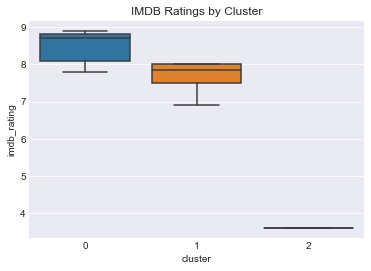

In [ ]:
# Plotting cluster vs imdb_rating
sns.boxplot(x= 'cluster', y= 'imdb_rating', data= cult_classics)
plt.title('IMDB Ratings by Cluster')
plt.show()

Genres in **cluster 0** are mostly enjoyed by the audience. This helps us know where most cult classics lie. Additionally, genres in **cluster 1** are also enjoyed by the audience. Genres in **cluster 2** are not really enjoyed by the audience.

#### Analyze genres in each plot
We will be trying to figure out what genres lie in each cluster, to know what combinations work best.

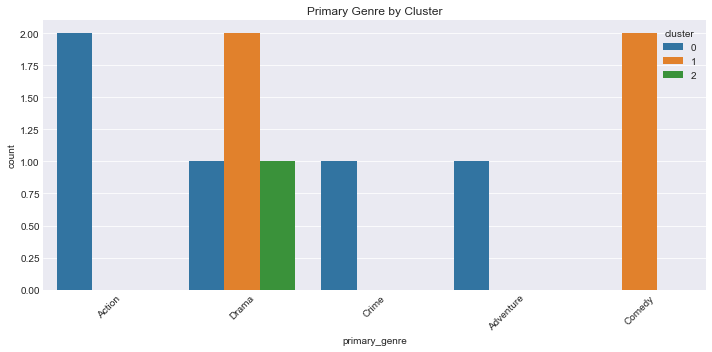

In [86]:
# Countplot of genres in each cluster
plt.figure(figsize=(10, 5))
sns.countplot(data=cult_classics, x='primary_genre', hue='cluster')
plt.title('Primary Genre by Cluster')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
cult_classics

Cult films that contain Action, Drama, Crime and Adventure genres make the best films in box office, followed closely by cult films in the Comedy genre. However, cult films that contain soem drama should be examined well as the genre is in all three clusters.

It is important to note that **cluster 0** mostly actions and **cluster 1** is mostly dramas and comedies.  

## **Findings and Recommendations.**
### Findings.
- We found that cluster 0 contains genres that are high-budget blockbusters, they have high revenue, high votes. It also mostly contains actions

- Cluster 1 contains critically acclaimed but niche, they have high ratings but low revenue. These are the most enjoyed films. It is mostly comedies and dramas.

- Cluster 2 contains very low everything, it would not be wise to produce movies in this cluster.

### Recommendations.
Cult classics often appear in clusters where metascore and revenue are high as well as where ratings are high and revenue are moderate. The 